In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam_sms.csv", encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins",NaN,NaN,NaN
1741,ham,I can do that! I want to please you both insid...,NaN,NaN,NaN
690,ham,Was the farm open?,NaN,NaN,NaN
3180,ham,So many people seems to be special at first si...,NaN,NaN,NaN
1141,spam,I don't know u and u don't know me. Send CHAT ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#dropping useless colums with null values
df1 = df.drop(columns=['Unnamed: 3' ,  'Unnamed: 4' ,  'Unnamed: 2'])

In [7]:
df1.rename(columns = {'v1' : 'Category', 'v2': 'Message'}, inplace= True)

In [8]:
df1.sample(5)

,Category,Message
1561,ham,Dnt worry...use ice pieces in a cloth pack.als...
4506,ham,He neva grumble but i sad lor... Hee... Buy tm...
3820,ham,You are right though. I can't give you the spa...
1501,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
2107,ham,Hmmm ... And imagine after you've come home fr...


In [9]:
#performing one hot encoding
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [10]:
df1['Category'] = encode.fit_transform(df1['Category']) 

In [11]:
df1.sample(5)

,Category,Message
2800,0,Depends on where u going lor.
5226,0,Prabha..i'm soryda..realy..frm heart i'm sory
1946,0,Hey we can go jazz power yoga hip hop kb and y...
5428,0,You didnt complete your gist oh.
733,0,Even u dont get in trouble while convincing..j...


In [12]:
#checking for null values
df1.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
#checking for duplicate values
df1.duplicated().sum()

403

In [14]:
df2 = df1.drop_duplicates(keep = 'first')


In [15]:
df2.duplicated().sum()

0

In [16]:
df2.shape

(5169, 2)

In [17]:
#STEP 2 STARTS FROM HERE (Exploratory data analysis)

In [18]:
df2['Category'].value_counts()

0    4516
1     653
Name: Category, dtype: int64

In [19]:
import matplotlib.pyplot as plt

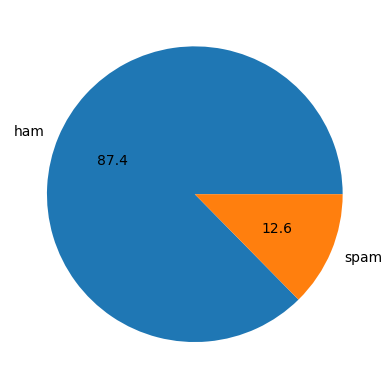

In [20]:
plt.pie(df2['Category'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.1f')
plt.show()

In [21]:
#the above pie chart shows how much the data is imbalanced therefore because there is a huge number of non spam and small number of spam


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#now we will create three new columns, no of words in the sms, number of characters in the sms, number of sentences in the sms

In [25]:
df2['No_of_Chars'] = df2['Message'].apply(len)
df2['No_of_words'] = df2['Message'].apply(lambda x:  len(nltk.word_tokenize(x))) #nltk word_tokenize breaks thecomplete statement into single single word and count it separately all
df2['No_of_sentences'] = df2['Message'].apply(lambda x:  len(nltk.sent_tokenize(x))) #nltk sent_tokenize breaks the complete statement into single single sentence and count it separately all
df2.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9996\2269642495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['No_of_Chars'] = df2['Message'].apply(len)
C:\Users\HP\AppData\Local\Temp\ipykernel_9996\2269642495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['No_of_words'] = df2['Message'].apply(lambda x:  len(nltk.word_tokenize(x))) #nltk word_tokenize breaks thecomplete statement into single single word and count it separately all
C:\Users\HP\AppData\Local\Temp\ipykernel_9996\2269642495.py:3: Se

,Category,Message,No_of_Chars,No_of_words,No_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df2[['No_of_Chars', 'No_of_words','No_of_sentences']].describe()

,No_of_Chars,No_of_words,No_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#spam messages
df2[df2['Category'] == 0][['No_of_Chars', 'No_of_words','No_of_sentences']].describe()

,No_of_Chars,No_of_words,No_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#non-spam messages
df2[df2['Category'] == 1][['No_of_Chars', 'No_of_words','No_of_sentences']].describe()

,No_of_Chars,No_of_words,No_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
#the above description we have analyzed how different spam message are than non spam messages as the spam messages are kinda more lengthy than non spam messages.

In [30]:
import seaborn as sns

<Axes: xlabel='No_of_Chars', ylabel='Count'>

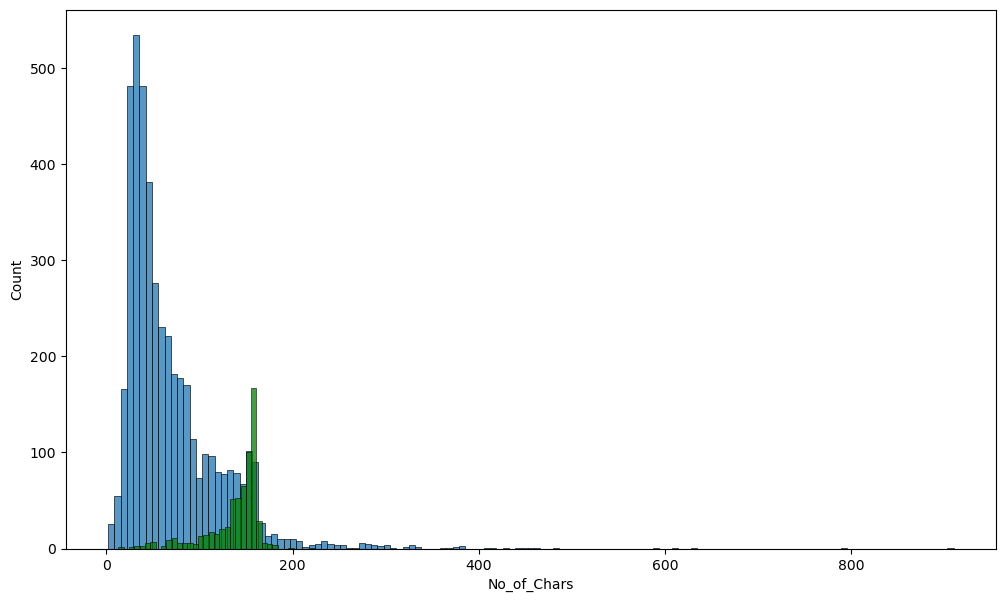

In [31]:
plt.figure(figsize = (12,7))
sns.histplot(df2[df2['Category'] == 0]['No_of_Chars'])
sns.histplot(df2[df2['Category'] == 1]['No_of_Chars'], color='green')

<Axes: xlabel='No_of_words', ylabel='Count'>

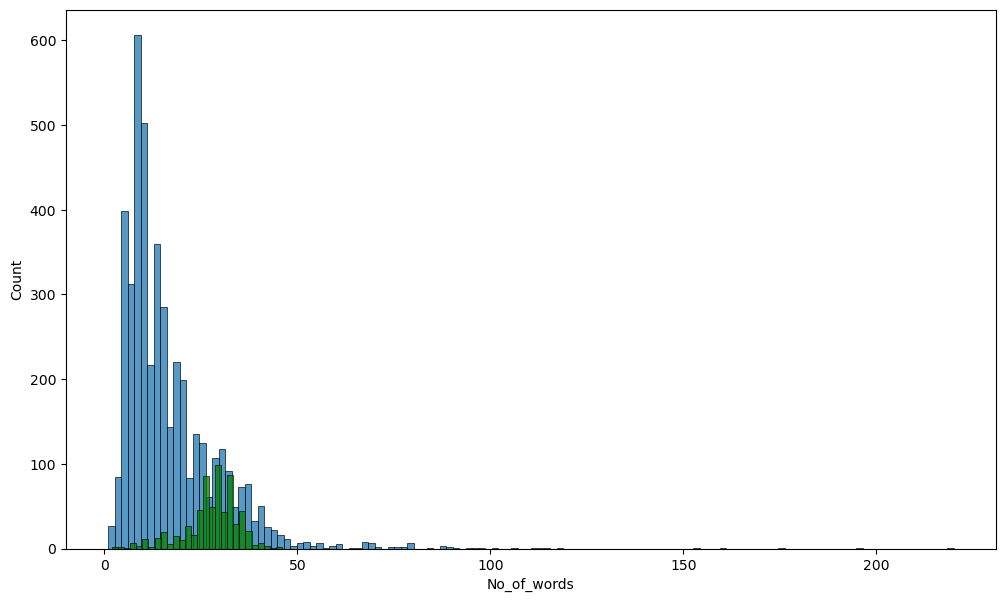

In [32]:
plt.figure(figsize = (12,7))
sns.histplot(df2[df2['Category'] == 0]['No_of_words'])
sns.histplot(df2[df2['Category'] == 1]['No_of_words'], color='green')

<Axes: xlabel='No_of_words', ylabel='No_of_sentences'>

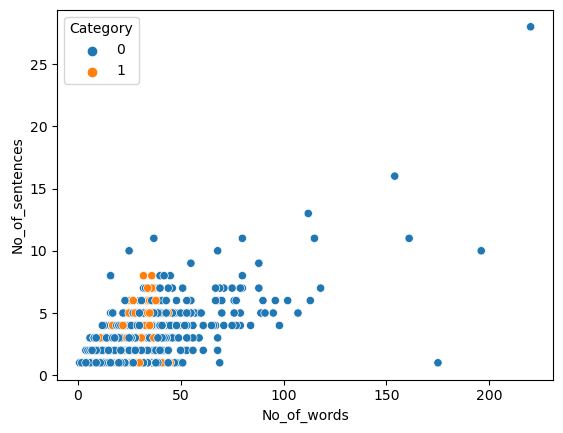

In [33]:
sns.scatterplot(data=df2,  hue="Category", x = 'No_of_words',  y = 'No_of_sentences'  )

C:\Users\HP\AppData\Local\Temp\ipykernel_9996\2006586151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot= True)


<Axes: >

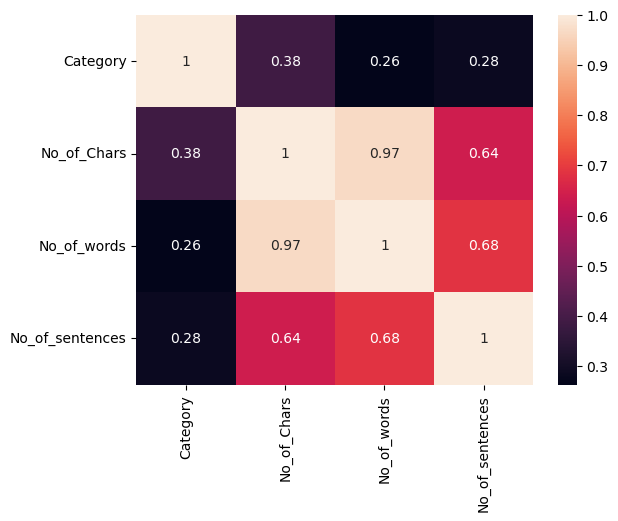

In [34]:
#using heatmap to check the correlation
sns.heatmap(df2.corr(), annot= True)

In [35]:
#The above heatmap shows the relation between the three of them. In the above case, we can see category is 1 meaning spam, we can conclude that no_of_chars has 0.38 codependency with category meaning the higher the characters the higher charces of it being spam, same as no_of_words having 0.26 codependency with category and so on

In [36]:
#we'll take the no_of_chars for analysis since it has the highest codependency with the category (0.38)

In [37]:
#here starts step 3 (data preprocessing)

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [40]:
#The function below will turn all the texts into lowercase, tokenize it (break into smaller words), remove unnecessary punctuations, stop wordsand special words, and stem it (stemming is the process of converting two or more different words with same meaning into a single word)

def enhanced_message(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
enhanced_message('I loved going out in the rain! No way she fought me over that thing?? How is the possible#')

'love go rain way fought thing possibl'

In [42]:
df2['Enhanced_message'] = df2['Message'].apply(enhanced_message)

C:\Users\HP\AppData\Local\Temp\ipykernel_9996\766736622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Enhanced_message'] = df2['Message'].apply(enhanced_message)


In [43]:
df2.head(5)

,Category,Message,No_of_Chars,No_of_words,No_of_sentences,Enhanced_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
sn = WordCloud(width=600, height= 600, min_font_size = 10, background_color= 'black')

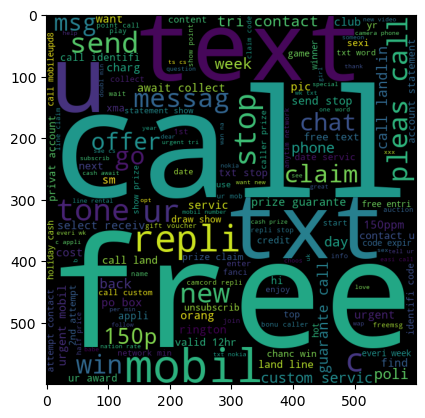

In [45]:
spam_count = sn.generate(df2[df2['Category'] == 1]['Enhanced_message'].str.cat(sep = '  '))
plt.imshow(spam_count)

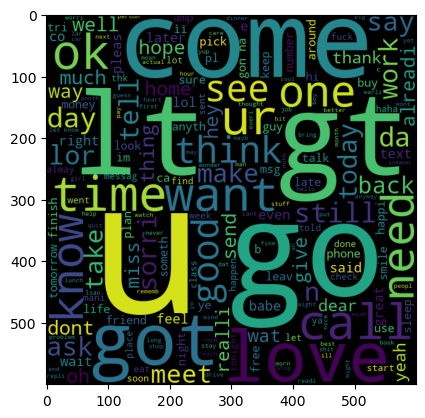

In [46]:
nonspam_count = sn.generate(df2[df2['Category'] == 0]['Enhanced_message'].str.cat(sep = '  '))
plt.imshow(spam_count)

In [47]:
spam_words = []
for msg in df2[df2['Category'] == 1]['Enhanced_message'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [48]:
len(spam_words)

9939

In [49]:
from collections import Counter

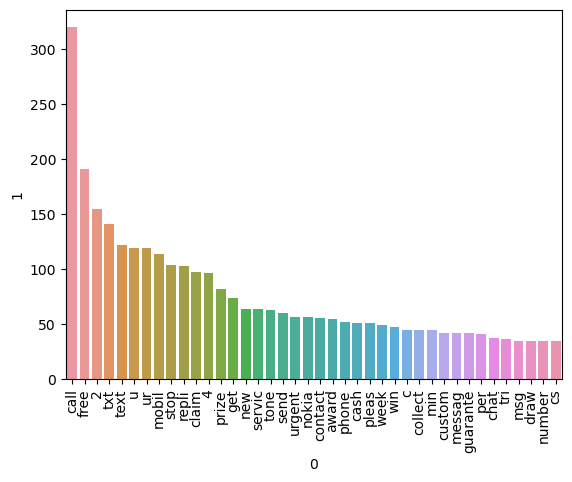

In [50]:
sns.barplot(x = pd.DataFrame(Counter(spam_words).most_common(40))[0], y = pd.DataFrame(Counter(spam_words).most_common(40))[1])
axis = plt.gca()  # Get the current axes object
axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')
plt.show()

In [51]:
nonspam_words = []
for msg in df2[df2['Category'] == 0]['Enhanced_message'].tolist():
    for word in msg.split():
        nonspam_words.append(word)

In [52]:
len(nonspam_words)

35394

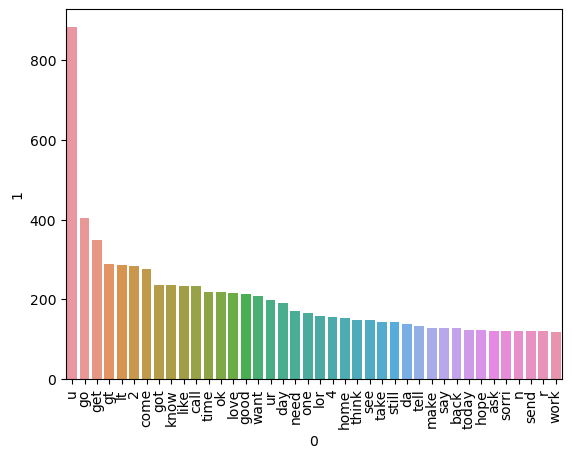

In [53]:
sns.barplot(x = pd.DataFrame(Counter(nonspam_words).most_common(40))[0], y = pd.DataFrame(Counter(nonspam_words).most_common(40))[1])
axis = plt.gca()  # Get the current axes object
axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')
plt.show()

In [54]:
#here starts the 4th step (Model building) We will be using naive bayes model for it because it performs the best on textual data

In [55]:
#vectorizing the data using bag of words technique 

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [57]:
X = cv.fit_transform(df2['Enhanced_message']).toarray()

In [58]:
X.shape 

(5169, 6708)

In [59]:
y = df2['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
#True positive = actual data is true. Machine predicts true
#True negative = actual data is false. Machine predicts false
#False positive = actual data is false. Machine predicts true
#False negative = actual data is true. Machine predicts false

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
0.5315315315315315


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
0.8344370860927153


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
0.9734513274336283


In [66]:
X = tfidf.fit_transform(df2['Enhanced_message']).toarray()

In [67]:
y = df2['Category'].values

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
0.5231481481481481


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
0.9734513274336283


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [77]:
algos = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}


def training(algo, X_train, X_test, y_train, y_test):
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [78]:
Accuracy_score = []
Precision_score = []

for name, algo in algos.items():

    current_accuracy, current_precision = training(algo, X_train, X_test, y_train, y_test)
    
    print("For", name)
    print("Accuracy :", current_accuracy)
    print("Precision :", current_precision)
    print('\n')
    
    Accuracy_score.append(current_accuracy)
    Precision_score.append(current_precision)

For SVC
Accuracy : 0.9729206963249516
Precision : 0.9741379310344828


For KN
Accuracy : 0.9003868471953579
Precision : 1.0


For NB
Accuracy : 0.9593810444874274
Precision : 1.0


For DT
Accuracy : 0.937137330754352
Precision : 0.8543689320388349


For LR
Accuracy : 0.9516441005802708
Precision : 0.94


For RF
Accuracy : 0.9738878143133463
Precision : 1.0




In [80]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('spam_model.pkl', 'wb'))